In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import pearsonr
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
sheet = "2023"
#df = pd.read_excel(file_path, sheet_name=sheet_name)

spm_data= pd.read_excel("datasets/SPM-Data.xlsx", sheet_name = sheet)

spm_data.head()

State                            Continuum of Care (CoC) HUD CoC Number  \
0    AK                                      Anchorage CoC         AK-500   
1    AK                        Alaska Balance of State CoC         AK-501   
2    AL  Birmingham/Jefferson, St. Clair, Shelby Counti...         AL-500   
3    AL            Mobile City & County/Baldwin County CoC         AL-501   
4    AL                     Florence/Northwest Alabama CoC         AL-502   

   2023 CoC Award Amount\n($- indicates that an application was not submitted)  \
0                                          4398847.0                             
1                                          1882145.0                             
2                                         10506251.0                             
3                                          4719165.0                             
4                                           417754.0                             

  AHAR Part 1 CoC Category  \
0  Other Largely Urban CoC   
1        Largely Rural CoC   
2     Largely Suburban CoC   
3  Other Largely Urban CoC   
4        Largely Rural CoC   

   Total Year Round (non-EHV and non-disaster) beds in 2023 HIC  \
0                                             2293.0              
1                                             1655.0              
2                                             2221.0              
3                                              817.0              
4                                              302.0              

   Total Year Round beds in HMIS or Comparable Databases in 2023 HIC  \
0                                             1862.0                   
1                                             1198.0                   
2                                             2191.0                   
3                                              817.0                   
4                                              206.0                   

   2023 Bed coverage Percent   SPM1-ES-SH Avg (Days)  \
0                    0.812037                   96.0   
1                    0.723867                   49.8   
2                    0.986493                   62.2   
3                    1.000000                   44.1   
4                    0.682119                   59.7   

   SPM1-ES-SH Median (Days)  ...  HMIS DQ - ES Percent Unknown Destinations  \
0                      49.0  ...                                   0.561383   
1                      20.0  ...                                   0.496904   
2                      24.0  ...                                   0.070574   
3                      14.0  ...                                   0.594804   
4                      24.0  ...                                   0.030303   

   HMIS DQ Exits Universe - TH  HMIS DQ Unknown Destinations - TH  \
0                          280                                101   
1                          260                                 21   
2                          113                                  2   
3                          200                                 11   
4                            0                                  0   

   HMIS DQ - TH Percent Unknown Destinations  HMIS DQ Exits Universe - RRH  \
0                                   0.360714                           763   
1                                   0.080769                           140   
2                                   0.017699                           808   
3                                   0.055000                           252   
4                                        NaN                            48   

   HMIS DQ Unknown Destinations - RRH  \
0                                 152   
1                                  13   
2                                  43   
3                                   2   
4                                   0   

   HMIS DQ - RRH Percent Unknown Destinations  HMIS DQ Exits Universe - PSH  \
0      

In [3]:
# Display basic information about the new dataset
data_info= {
    "Shape": spm_data.shape,
    "Columns": spm_data.columns.tolist(),
    "Sample Rows": spm_data.head(),
    "Missing Values": spm_data.isnull().sum(),
    "Data Types": spm_data.dtypes,
}
data_info

{'Shape': (387, 96),
 'Columns': ['State',
  'Continuum of Care (CoC)',
  'HUD CoC Number',
  '2023 CoC Award Amount\n($- indicates that an application was not submitted)',
  'AHAR Part 1 CoC Category',
  'Total Year Round (non-EHV and non-disaster) beds in 2023 HIC',
  'Total Year Round beds in HMIS or Comparable Databases in 2023 HIC',
  '2023 Bed coverage Percent ',
  'SPM1-ES-SH Avg (Days)',
  'SPM1-ES-SH Median (Days)',
  'SPM1-ES-SH-TH Avg (Days)',
  'SPM1- ES-SH-TH Median (Days)',
  'SPM2-(Street-Outreach)-Total Persons Exited (SO)',
  'SPM2-(Street-Outreach)-Total Persons Returns in 6 mths',
  'SPM2-(Street-Outreach)-Total Persons Returns in 12 mths (should include the 6-month cohort)',
  'SPM2-(Street-Outreach)-Total Persons Returns in 24 mths (should include both the 6- and 12-month cohort)',
  'SPM2-(Street-Outreach)-Percent Returns in 6 mths',
  'SPM2-(Street-Outreach)-Percent Returns in 12 mths (should include the 6-month cohort)',
  'SPM2-(Street-Outreach)-Percent Returns

## Analysis of SPM 2 features

In [4]:
# Select relevant columns
columns = [
    "State",
    "Continuum of Care (CoC)",
    "HUD CoC Number",
    "2023 CoC Award Amount\n($- indicates that an application was not submitted)",
    "SPM2-(All)-Total Persons Exited (SO+ES+TH+SH+PH)",
    "SPM2-(All)-Total Persons Returns in 6 mths",
    "SPM2-(All)-Total Persons Returns in 12 mths (should include the 6-month cohort)",
    "SPM2-(All)-Total Persons Returns in 24 mths (should include both the 6- and 12-month cohort)",
#     "SPM2-(All)-Percent Returns in 6 mths",
#     "SPM2-(All)-Percent Returns in 12 mths (should include the 6-month cohort)",
#     "SPM2-(All)-Percent Returns in 24 mths (should include both the 6- and 12-month cohort)"
]

# Subset the data
subset_data = spm_data[columns]
subset_data

State                            Continuum of Care (CoC) HUD CoC Number  \
0      AK                                      Anchorage CoC         AK-500   
1      AK                        Alaska Balance of State CoC         AK-501   
2      AL  Birmingham/Jefferson, St. Clair, Shelby Counti...         AL-500   
3      AL            Mobile City & County/Baldwin County CoC         AL-501   
4      AL                     Florence/Northwest Alabama CoC         AL-502   
..    ...                                                ...            ...   
382    WV                          Wheeling/Weirton Area CoC         WV-500   
383    WV              Huntington/Cabell, Wayne Counties CoC         WV-501   
384    WV  Charleston/Kanawha, Putnam, Boone, Clay Counti...         WV-503   
385    WV                 West Virginia Balance of State CoC         WV-508   
386    WY                              Wyoming Statewide CoC         WY-500   

     2023 CoC Award Amount\n($- indicates that an application was not submitted)  \
0                                            4398847.0                             
1                                            1882145.0                             
2                                           10506251.0                             
3                                            4719165.0                             
4                                             417754.0                             
..                                                 ...                             
382                                           299290.0                             
383                                          3321183.0                             
384                                          1630264.0                             
385                                          6982633.0                             
386                                           995688.0                             

     SPM2-(All)-Total Persons Exited (SO+ES+TH+SH+PH)  \
0                                                 948   
1                                                 517   
2                                                 934   
3                                                 459   
4                                                 114   
..                                                ...   
382                                               132   
383                                               555   
384                                               432   
385                                              1769   
386                                               975   

     SPM2-(All)-Total Persons Returns in 6 mths  \
0                                           113   
1                                            66   
2                                            65   
3                                            21   
4                                             5   
..                                          ...   
382                                          12   
383                                          77   
384                                          91   
385                                         191   
386                                         137   

     SPM2-(All)-Total Persons Returns in 12 mths (should include the 6-month cohort)  \
0                                                  172                                 
1                                                   95                                 
2                                                   82                                 
3                                                   43                                 
4                                                   10                                 
..                                                 ...                                 
382                                                 20                                 
383                                         

In [5]:
# Rename columns for simplicity
subset_data.rename(columns={
    "2023 CoC Award Amount\n($- indicates that an application was not submitted)": "CoC Award Amount",
    "SPM2-(All)-Total Persons Exited (SO+ES+TH+SH+PH)": "Total Persons Exited",
    "SPM2-(All)-Total Persons Returns in 6 mths": "Returns in 6 mths",
    "SPM2-(All)-Total Persons Returns in 12 mths (should include the 6-month cohort)": "Returns in 12 mths",
    "SPM2-(All)-Total Persons Returns in 24 mths (should include both the 6- and 12-month cohort)": "Returns in 24 mths",
#     "SPM2-(All)-Percent Returns in 6 mths": "Percent Returns in 6 mths",
#     "SPM2-(All)-Percent Returns in 12 mths (should include the 6-month cohort)": "Percent Returns in 12 mths",
#     "SPM2-(All)-Percent Returns in 24 mths (should include both the 6- and 12-month cohort)": "Percent Returns in 24 mths"
}, inplace=True)
subset_data

State                            Continuum of Care (CoC) HUD CoC Number  \
0      AK                                      Anchorage CoC         AK-500   
1      AK                        Alaska Balance of State CoC         AK-501   
2      AL  Birmingham/Jefferson, St. Clair, Shelby Counti...         AL-500   
3      AL            Mobile City & County/Baldwin County CoC         AL-501   
4      AL                     Florence/Northwest Alabama CoC         AL-502   
..    ...                                                ...            ...   
382    WV                          Wheeling/Weirton Area CoC         WV-500   
383    WV              Huntington/Cabell, Wayne Counties CoC         WV-501   
384    WV  Charleston/Kanawha, Putnam, Boone, Clay Counti...         WV-503   
385    WV                 West Virginia Balance of State CoC         WV-508   
386    WY                              Wyoming Statewide CoC         WY-500   

     CoC Award Amount  Total Persons Exited  Returns in 6 mths  \
0           4398847.0                   948                113   
1           1882145.0                   517                 66   
2          10506251.0                   934                 65   
3           4719165.0                   459                 21   
4            417754.0                   114                  5   
..                ...                   ...                ...   
382          299290.0                   132                 12   
383         3321183.0                   555                 77   
384         1630264.0                   432                 91   
385         6982633.0                  1769                191   
386          995688.0                   975                137   

     Returns in 12 mths  Returns in 24 mths  
0                   172                 226  
1                    95                 123  
2                    82                 110  
3                    43                  71  
4                    10                  13  
..                  ...                 ...  
382                  20                  25  
383                 122                 163  
384                 112                 138  
385                 272                 351  
386                 187                 226  

[387 rows x 8 columns]

### Convert related column values to numeric

In [6]:
# Ensure numeric columns are properly formatted
numeric_columns = [
    "CoC Award Amount", "Total Persons Exited", "Returns in 6 mths", "Returns in 12 mths",
    "Returns in 24 mths",
#     "Percent Returns in 6 mths", "Percent Returns in 12 mths",
#     "Percent Returns in 24 mths"
]
for col in numeric_columns:
    subset_data[col] = pd.to_numeric(subset_data[col], errors='coerce')
subset_data

State                            Continuum of Care (CoC) HUD CoC Number  \
0      AK                                      Anchorage CoC         AK-500   
1      AK                        Alaska Balance of State CoC         AK-501   
2      AL  Birmingham/Jefferson, St. Clair, Shelby Counti...         AL-500   
3      AL            Mobile City & County/Baldwin County CoC         AL-501   
4      AL                     Florence/Northwest Alabama CoC         AL-502   
..    ...                                                ...            ...   
382    WV                          Wheeling/Weirton Area CoC         WV-500   
383    WV              Huntington/Cabell, Wayne Counties CoC         WV-501   
384    WV  Charleston/Kanawha, Putnam, Boone, Clay Counti...         WV-503   
385    WV                 West Virginia Balance of State CoC         WV-508   
386    WY                              Wyoming Statewide CoC         WY-500   

     CoC Award Amount  Total Persons Exited  Returns in 6 mths  \
0           4398847.0                   948                113   
1           1882145.0                   517                 66   
2          10506251.0                   934                 65   
3           4719165.0                   459                 21   
4            417754.0                   114                  5   
..                ...                   ...                ...   
382          299290.0                   132                 12   
383         3321183.0                   555                 77   
384         1630264.0                   432                 91   
385         6982633.0                  1769                191   
386          995688.0                   975                137   

     Returns in 12 mths  Returns in 24 mths  
0                   172                 226  
1                    95                 123  
2                    82                 110  
3                    43                  71  
4                    10                  13  
..                  ...                 ...  
382                  20                  25  
383                 122                 163  
384                 112                 138  
385                 272                 351  
386                 187                 226  

[387 rows x 8 columns]

### Missing Values 

In [7]:
# Check for missing values
print("Missing Values:")
print(subset_data.isnull().sum())

Missing Values:
State                      0
Continuum of Care (CoC)    0
HUD CoC Number             0
CoC Award Amount           4
Total Persons Exited       0
Returns in 6 mths          0
Returns in 12 mths         0
Returns in 24 mths         0
dtype: int64


In [8]:
# Check for missing values in relevant numeric columns
missing_data = subset_data[subset_data[numeric_columns].isnull().any(axis=1)]

# Print the rows with missing values
print("Rows with missing values in the selected numeric columns:")
print(missing_data)

# Count missing values for each column
missing_count = subset_data[numeric_columns].isnull().sum()
print("\nCount of missing values in each column:")
print(missing_count)

Rows with missing values in the selected numeric columns:
    State                            Continuum of Care (CoC) HUD CoC Number  \
7      AL                      Gadsden/Northeast Alabama CoC         AL-505   
10     AL  Dothan/Coffee, Dale, Geneva, Henry, Houston Co...         AL-508   
156    MA  Pittsfield/Berkshire, Franklin, Hampshire Coun...         MA-507   
211    MP                       Northern Mariana Islands CoC         MP-500   

     CoC Award Amount  Total Persons Exited  Returns in 6 mths  \
7                 NaN                    13                  2   
10                NaN                     0                  0   
156               NaN                   331                 20   
211               NaN                    39                  0   

     Returns in 12 mths  Returns in 24 mths  
7                     2                   5  
10                    0                   0  
156                  25                  40  
211                   0        

In [9]:
# Drop rows with missing values in relevant columns
subset_data = subset_data.dropna(subset=numeric_columns)

In [10]:
subset_data

State                            Continuum of Care (CoC) HUD CoC Number  \
0      AK                                      Anchorage CoC         AK-500   
1      AK                        Alaska Balance of State CoC         AK-501   
2      AL  Birmingham/Jefferson, St. Clair, Shelby Counti...         AL-500   
3      AL            Mobile City & County/Baldwin County CoC         AL-501   
4      AL                     Florence/Northwest Alabama CoC         AL-502   
..    ...                                                ...            ...   
382    WV                          Wheeling/Weirton Area CoC         WV-500   
383    WV              Huntington/Cabell, Wayne Counties CoC         WV-501   
384    WV  Charleston/Kanawha, Putnam, Boone, Clay Counti...         WV-503   
385    WV                 West Virginia Balance of State CoC         WV-508   
386    WY                              Wyoming Statewide CoC         WY-500   

     CoC Award Amount  Total Persons Exited  Returns in 6 mths  \
0           4398847.0                   948                113   
1           1882145.0                   517                 66   
2          10506251.0                   934                 65   
3           4719165.0                   459                 21   
4            417754.0                   114                  5   
..                ...                   ...                ...   
382          299290.0                   132                 12   
383         3321183.0                   555                 77   
384         1630264.0                   432                 91   
385         6982633.0                  1769                191   
386          995688.0                   975                137   

     Returns in 12 mths  Returns in 24 mths  
0                   172                 226  
1                    95                 123  
2                    82                 110  
3                    43                  71  
4                    10                  13  
..                  ...                 ...  
382                  20                  25  
383                 122                 163  
384                 112                 138  
385                 272                 351  
386                 187                 226  

[383 rows x 8 columns]

## Analysis Between CoC Award Amount and SPM 2 Columns (per CoC)

### Plot scatterplots for visualization

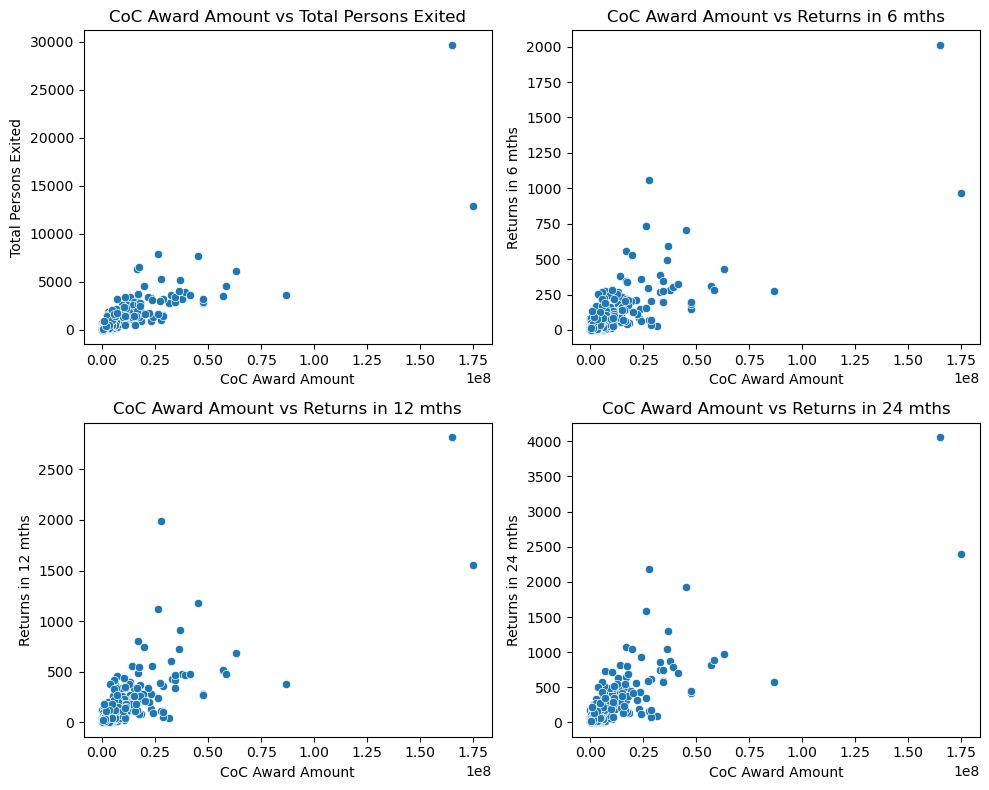

In [11]:
# Scatterplots for CoC Award Amount vs SPM 2 columns
plt.figure(figsize=(10, 8))
for i, col in enumerate(numeric_columns[1:], start=1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x="CoC Award Amount", y=col, data=subset_data)
    plt.title(f"CoC Award Amount vs {col}")
    plt.xlabel("CoC Award Amount")
    plt.ylabel(col)
plt.tight_layout()
plt.show()

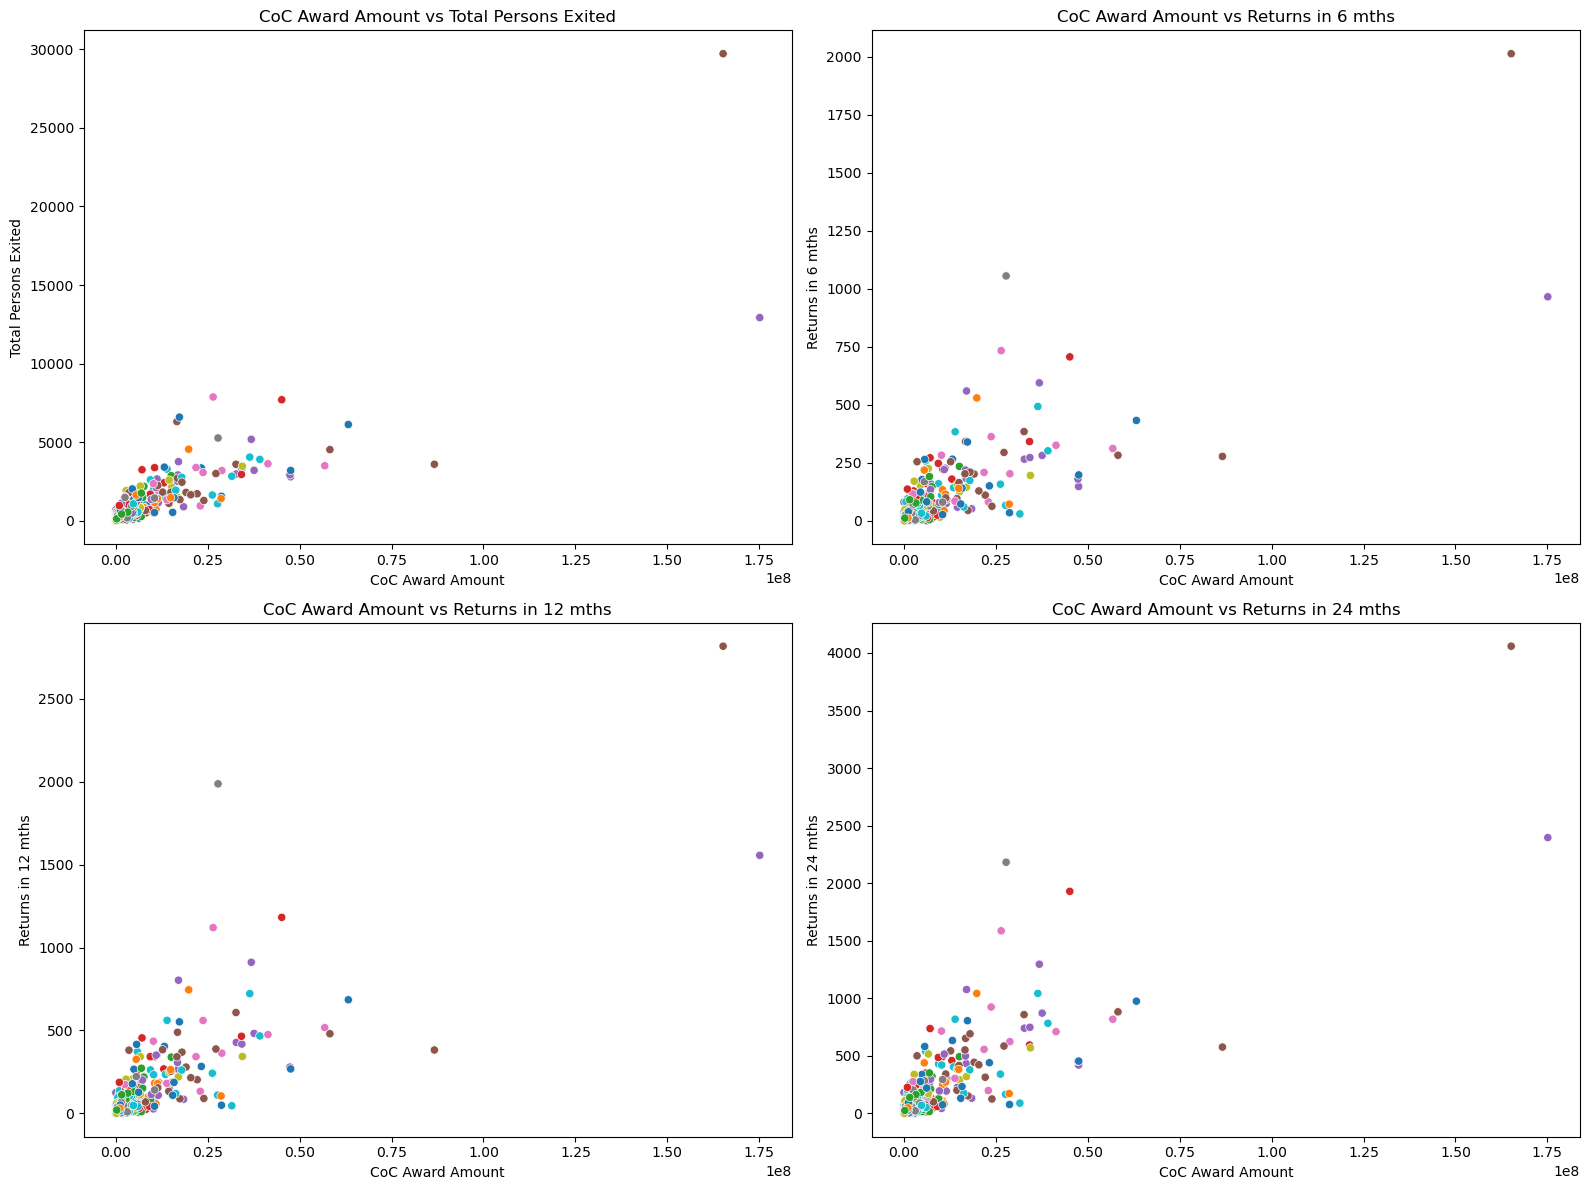

In [12]:
# Scatterplots for CoC Award Amount vs SPM 2 columns, colored by State
plt.figure(figsize=(16, 12))

# Loop through numeric columns (SPM 2 related columns)
for i, col in enumerate(numeric_columns[1:], start=1):
    plt.subplot(2,2, i)  # Adjust the grid size if you have more columns
    sns.scatterplot(
        x="CoC Award Amount", 
        y=col, 
        data=subset_data, 
        hue="State",  # Color points by State
        palette="tab10",  # Use a predefined color palette
        legend=False  # Set True if you want the legend
    )
    plt.title(f"CoC Award Amount vs {col}")
    plt.xlabel("CoC Award Amount")
    plt.ylabel(col)

plt.tight_layout()
plt.show()


### Correlation Analysis

In [13]:
# Correlation analysis
correlations = subset_data.corr()

# Print correlations with CoC Award Amount
print("Correlations with CoC Award Amount:")
print(correlations["CoC Award Amount"])

Correlations with CoC Award Amount:
CoC Award Amount        1.000000
Total Persons Exited    0.850325
Returns in 6 mths       0.788138
Returns in 12 mths      0.780762
Returns in 24 mths      0.816320
Name: CoC Award Amount, dtype: float64


### Statistical significance

In [14]:
# Statistical significance testing (Pearson correlation)
print("\nStatistical Significance (Pearson Correlation):")
for col in numeric_columns[1:]:
    corr, p_value = pearsonr(subset_data["CoC Award Amount"], subset_data[col])
    print(f"{col}: Correlation = {corr:.2f}, p-value = {p_value:.3e}")



Statistical Significance (Pearson Correlation):
Total Persons Exited: Correlation = 0.85, p-value = 2.870e-108
Returns in 6 mths: Correlation = 0.79, p-value = 2.567e-82
Returns in 12 mths: Correlation = 0.78, p-value = 7.992e-80
Returns in 24 mths: Correlation = 0.82, p-value = 7.565e-93


## Observation

- Since all p-values are far below the standard significance level (
𝑝<0.05), we can reject the null hypothesis, indicating that the observed correlations are unlikely to be due to chance.

- Total Persons Exited (0.85):
    The strong positive correlation suggests that higher CoC award amounts are associated with a greater number of persons exiting homelessness programs. This indicates that funding likely enables CoCs to serve a larger population effectively.

- Returns in 6, 12, and 24 Months (0.79–0.82):
    The positive correlations suggest that while higher funding may support more exits, it is also associated with more individuals returning to homelessness within 6, 12, or 24 months. This trend could imply challenges in providing sustained, long-term solutions for individuals exiting the system.

## Analysis Between CoC Award Amount and SPM 2 Columns (per State)

In [16]:
# Aggregate data by state, summing up the metrics
state_aggregated_award_amount = subset_data.groupby("State").sum()[
    [
        "CoC Award Amount",
        "Total Persons Exited",
        "Returns in 6 mths", "Returns in 12 mths",
        "Returns in 24 mths"
    ]
]

# Display the aggregated data
state_aggregated_award_amount.head()

CoC Award Amount  Total Persons Exited  Returns in 6 mths  \
State                                                              
AK            6280992.0                  1465                179   
AL           19450838.0                  2277                161   
AR            4193077.0                   641                 48   
AZ           64127782.0                 12124               1048   
CA          564584352.0                 56925               4450   

       Returns in 12 mths  Returns in 24 mths  
State                                          
AK                    267                 349  
AL                    226                 313  
AR                     78                 110  
AZ                   1707                2738  
CA                   7047               11041

In [18]:
# Scatterplots for total CoC Award Amount vs SPM 2 columns, colored by State
plt.figure(figsize=(16, 12))

# Loop through numeric columns (SPM 2 related columns)
for i, col in enumerate(numeric_columns[1:], start=1):
    plt.subplot(2,2, i)  # Adjust the grid size if you have more columns
    sns.scatterplot(
        x="CoC Award Amount", 
        y=col, 
        data=state_aggregated_award_amount, 
        hue="State",  # Color points by State
        palette="tab10",  # Use a predefined color palette
        legend=False  # Set True if you want the legend
    )
    plt.title(f"CoC Award Amount vs {col}")
    plt.xlabel("CoC Award Amount")
    plt.ylabel(col)

plt.tight_layout()
plt.show()

### Correlation 

In [21]:
# Correlation analysis
correlations = state_aggregated_award_amount.corr()

# Print correlations with CoC Award Amount
print("Correlations with State's total CoC Award Amount:")
print(correlations["CoC Award Amount"])

Correlations with State's total CoC Award Amount:
CoC Award Amount        1.000000
Total Persons Exited    0.943119
Returns in 6 mths       0.908980
Returns in 12 mths      0.910775
Returns in 24 mths      0.923651
Name: CoC Award Amount, dtype: float64


In [22]:
# Statistical significance testing (Pearson correlation)
print("\nStatistical Significance (Pearson Correlation):")
for col in numeric_columns[1:]:
    corr, p_value = pearsonr(state_aggregated_award_amount["CoC Award Amount"], state_aggregated_award_amount[col])
    print(f"{col}: Correlation = {corr:.2f}, p-value = {p_value:.3e}")


Statistical Significance (Pearson Correlation):
Total Persons Exited: Correlation = 0.94, p-value = 1.572e-26
Returns in 6 mths: Correlation = 0.91, p-value = 2.090e-21
Returns in 12 mths: Correlation = 0.91, p-value = 1.273e-21
Returns in 24 mths: Correlation = 0.92, p-value = 2.601e-23


## Observation:

Total Persons Exited (0.94):
- The strong positive correlation suggests that states receiving higher CoC funding see a significantly larger number of persons exiting homelessness programs.This indicates that funding allocation plays a crucial role in determining the scale of homelessness interventions.
    
Returns in 6, 12, and 24 Months (0.91–0.92):
- A strong positive correlation with return metrics implies that while higher funding enables more exits, it also correlates with a higher absolute number of individuals returning to homelessness within 6, 12, and 24 months.The returns increase proportionally with the scale of the program, reflecting scalability challenges in maintaining long-term stability for individuals exiting homelessness.

Stronger Correlations at the State Level:
- The correlations are slightly stronger at the state level compared to the CoC level (e.g., 0.94 for state-level vs. 0.85 for CoC-level in Total Persons Exited). This suggests that aggregating data across CoCs within a state provides a clearer overall trend.

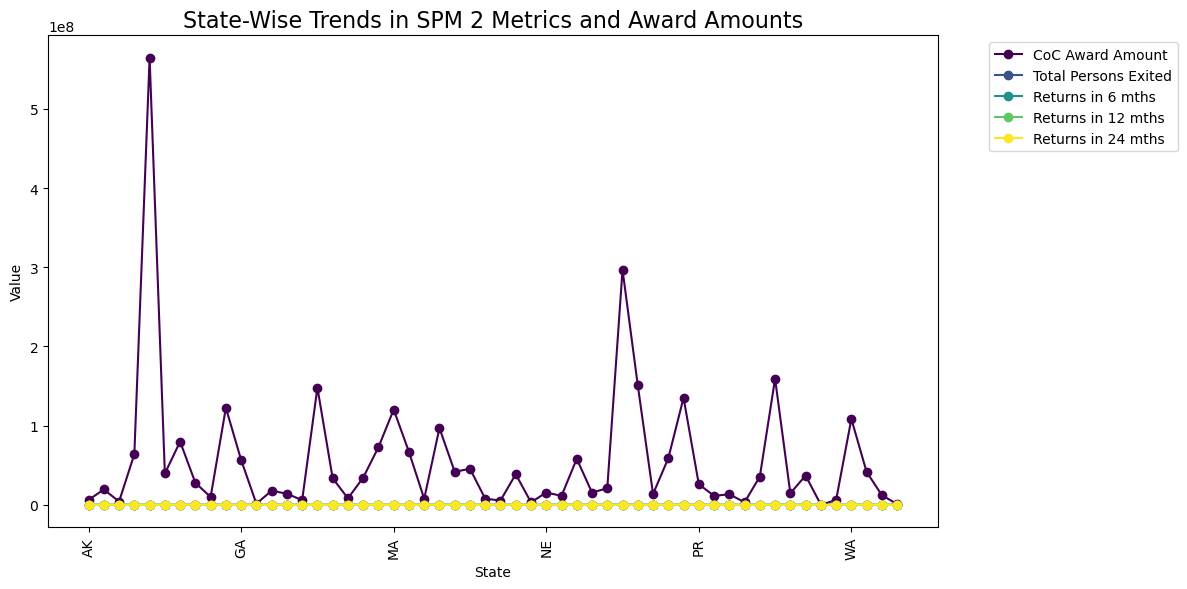

In [31]:
# Line plot for trends across states
state_aggregated_award_amount.plot(
    kind="line", 
    figsize=(12, 6), 
    marker="o", 
    colormap="viridis"
)
plt.title("State-Wise Trends in SPM 2 Metrics and Award Amounts", size=16)
plt.ylabel("Value")
plt.xlabel("State")
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [33]:
# Set style for better visuals
sns.set_theme(style="whitegrid")

# Extract columns for visualization
states = state_aggregated_award_amount.index  # State as index
award_amount = state_aggregated_award_amount["CoC Award Amount"]
total_exited = state_aggregated_award_amount["Total Persons Exited"]
returns_6 = state_aggregated_award_amount["Returns in 6 mths"]
returns_12 = state_aggregated_award_amount["Returns in 12 mths"]
returns_24 = state_aggregated_award_amount["Returns in 24 mths"]


In [35]:
# --- 1. Bar Plot: Comparison of Metrics Per State ---
plt.figure(figsize=(16, 8))
state_index = np.arange(len(states))
bar_width = 0.2

# Plot each metric
plt.bar(state_index, award_amount, width=bar_width, label="CoC Award Amount")
plt.bar(state_index + bar_width, total_exited, width=bar_width, label="Total Persons Exited")
plt.bar(state_index + 2 * bar_width, returns_6, width=bar_width, label="Returns in 6 Months")
plt.bar(state_index + 3 * bar_width, returns_12, width=bar_width, label="Returns in 12 Months")
plt.bar(state_index + 4 * bar_width, returns_24, width=bar_width, label="Returns in 24 Months")

plt.xlabel("States", fontsize=14)
plt.ylabel("Counts / Award Amount ($)", fontsize=14)
plt.title("Comparison of Metrics Per State", fontsize=16)
plt.xticks(state_index + 2 * bar_width, states, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


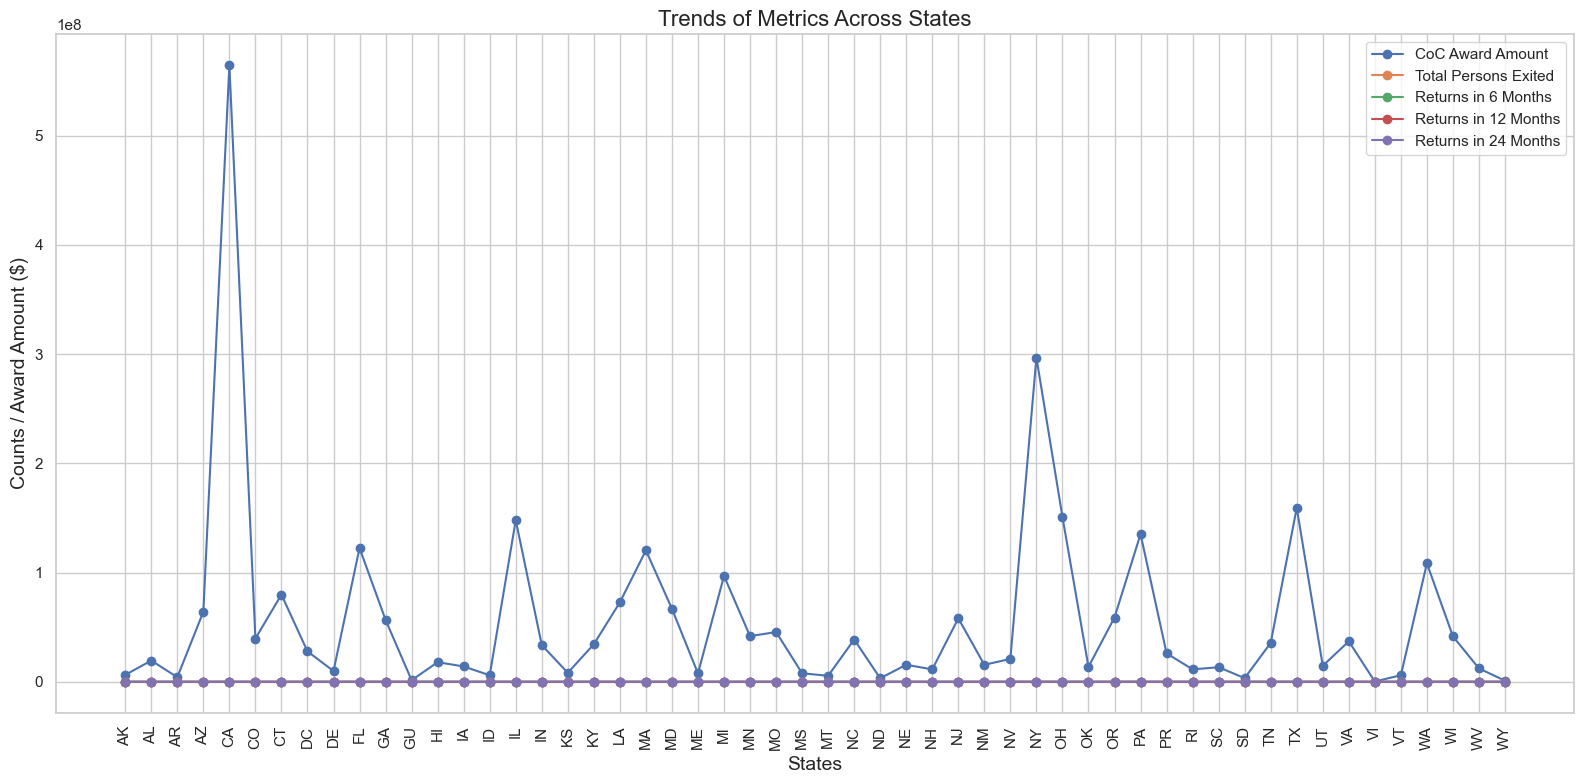

In [36]:
# --- 2. Line Plot: Trends Per State ---
plt.figure(figsize=(16, 8))
plt.plot(states, award_amount, label="CoC Award Amount", marker="o")
plt.plot(states, total_exited, label="Total Persons Exited", marker="o")
plt.plot(states, returns_6, label="Returns in 6 Months", marker="o")
plt.plot(states, returns_12, label="Returns in 12 Months", marker="o")
plt.plot(states, returns_24, label="Returns in 24 Months", marker="o")
plt.xlabel("States", fontsize=14)
plt.ylabel("Counts / Award Amount ($)", fontsize=14)
plt.title("Trends of Metrics Across States", fontsize=16)
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

## Ananlysis of State-Wise Trends for SPM2 features

### Aggregate data by state 

In [43]:
# Aggregate data by state, summing up the metrics
state_aggregated = subset_data.groupby("State").sum()[
    [
        "Total Persons Exited",
        "Returns in 6 mths", "Returns in 12 mths",
        "Returns in 24 mths"
    ]
]

# Display the aggregated data
state_aggregated.head()


Total Persons Exited  Returns in 6 mths  Returns in 12 mths  \
State                                                                
AK                     1465                179                 267   
AL                     2277                161                 226   
AR                      641                 48                  78   
AZ                    12124               1048                1707   
CA                    56925               4450                7047   

       Returns in 24 mths  
State                      
AK                    349  
AL                    313  
AR                    110  
AZ                   2738  
CA                  11041

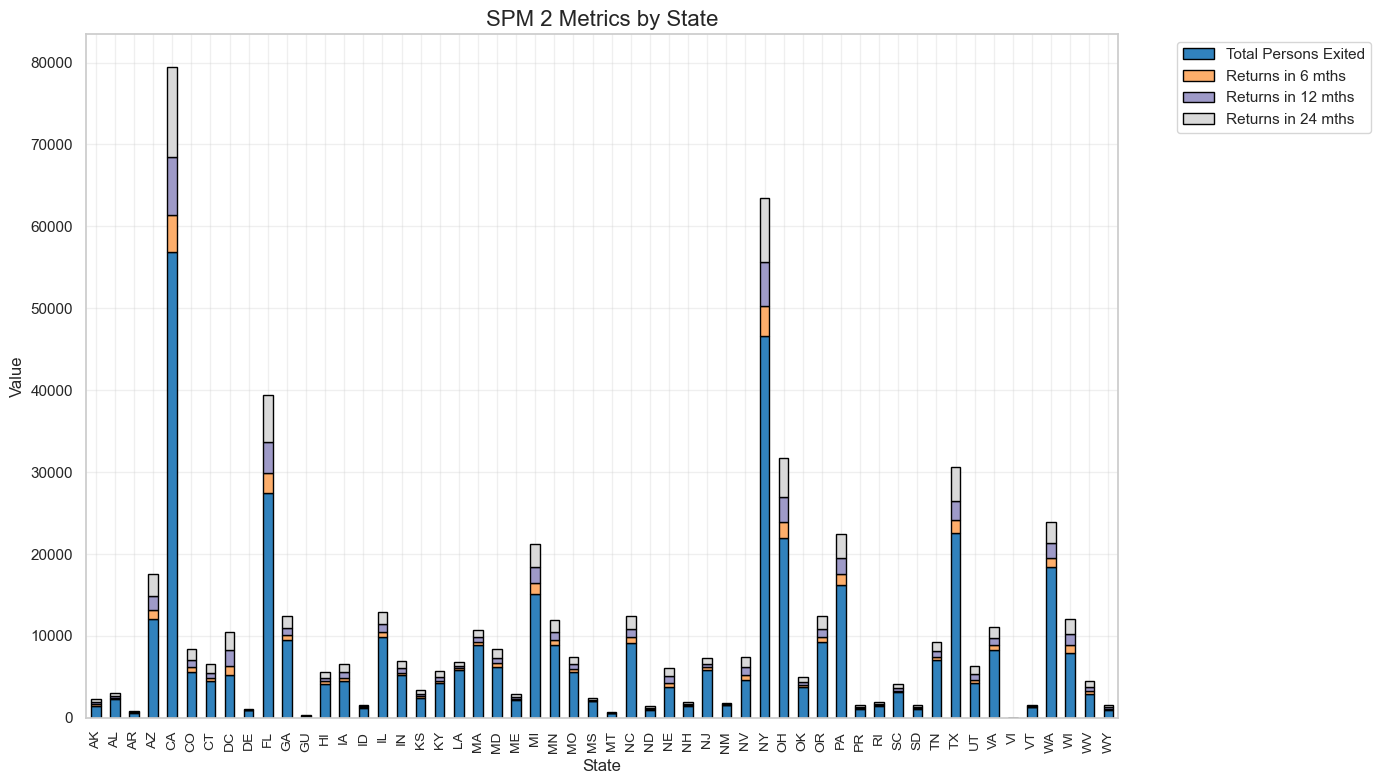

In [50]:
# Re-plot the stacked bar chart for all states
import matplotlib.pyplot as plt

# Drop NaN values from the dataset (if any) to avoid plotting issues
# sstate_aggregated_cleaned = state_aggregated.dropna()

# Plot
state_aggregated.plot(
    kind="bar", 
    stacked=True, 
    figsize=(14, 8), 
    colormap="tab20c", 
    edgecolor="black"
)
plt.title("SPM 2 Metrics by State", size=16)
plt.ylabel("Value", fontsize=12)
plt.xlabel("State", fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()  # Adjust layout for better fit
plt.grid(alpha=0.3)

plt.show()


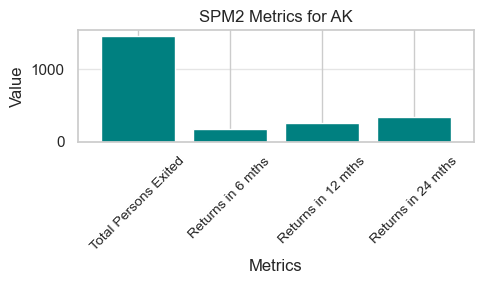

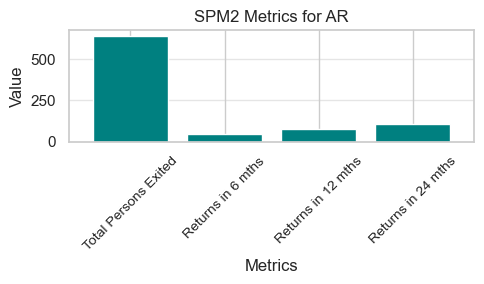

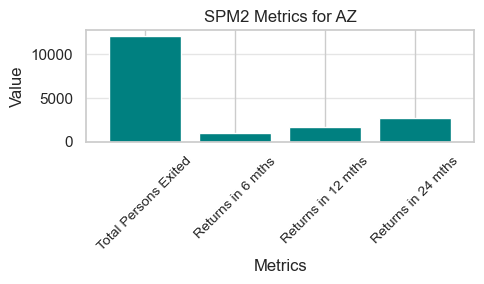

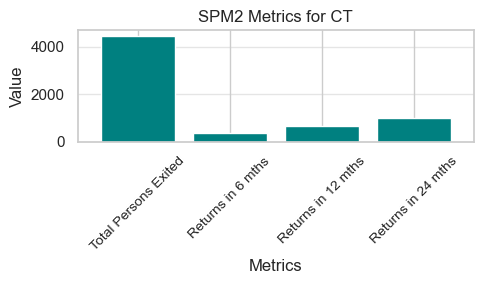

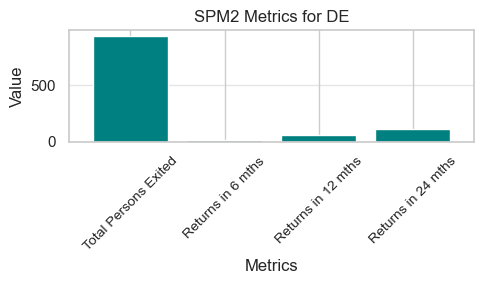

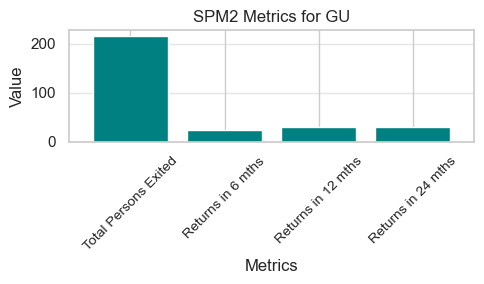

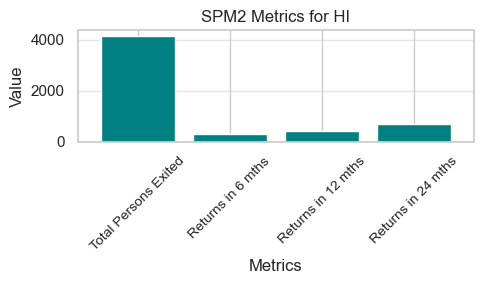

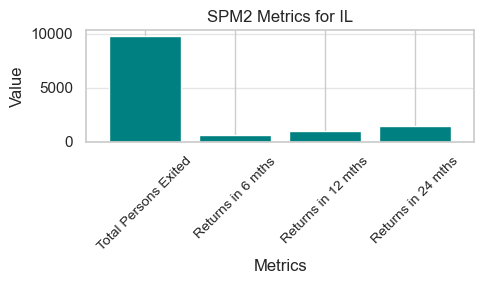

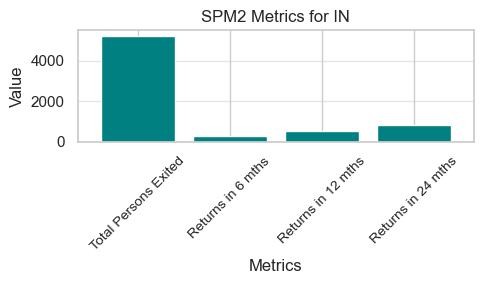

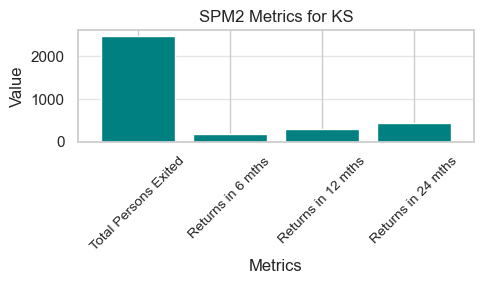

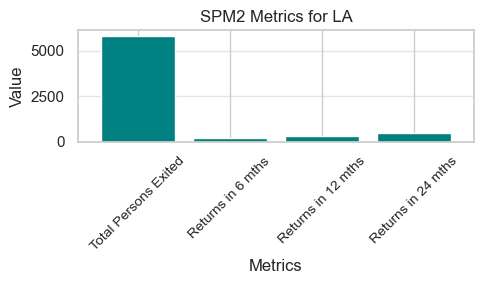

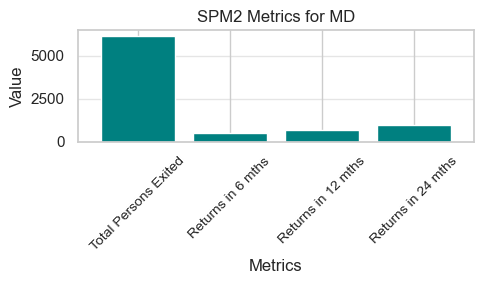

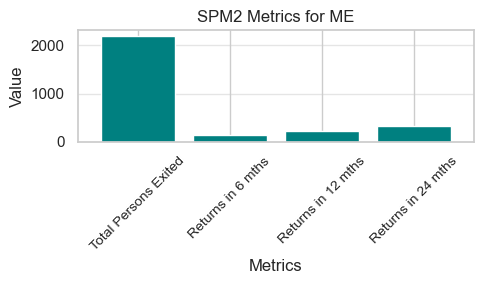

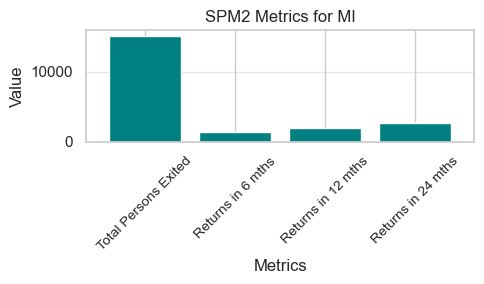

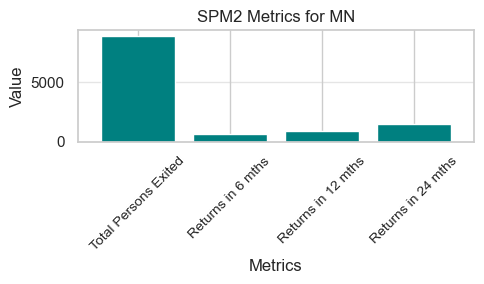

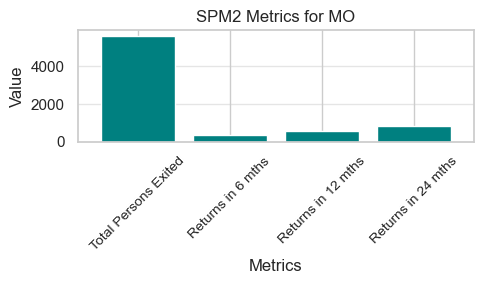

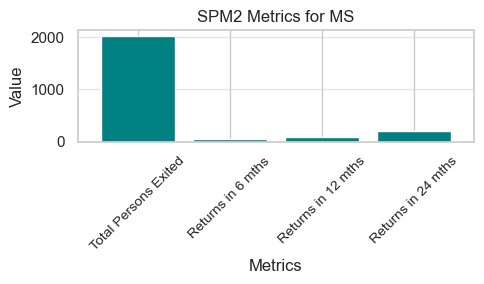

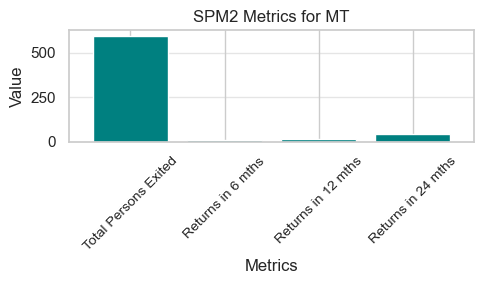

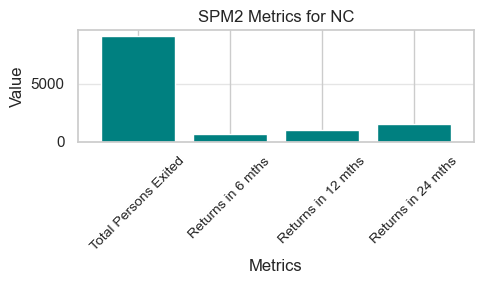

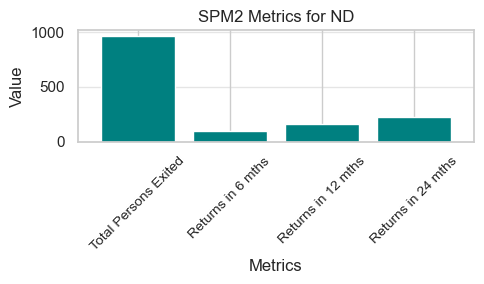

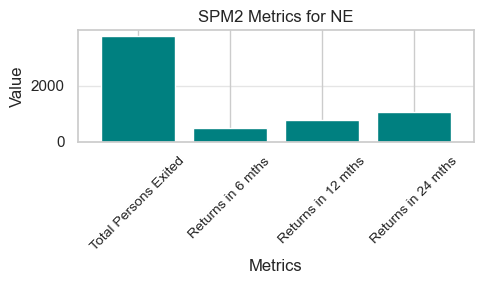

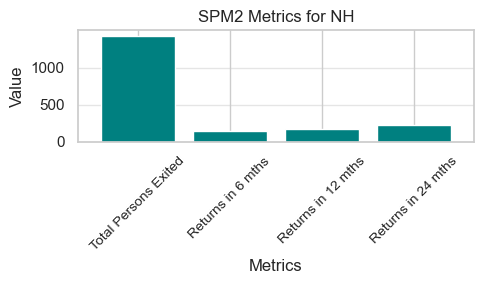

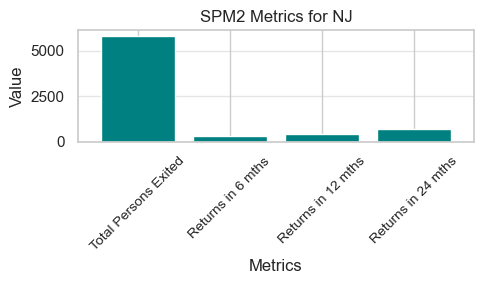

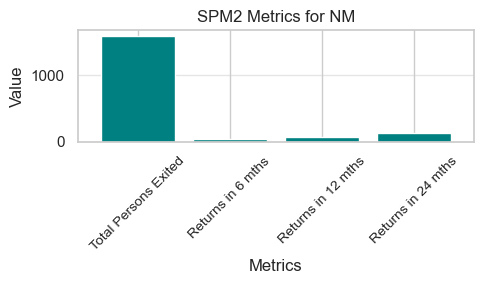

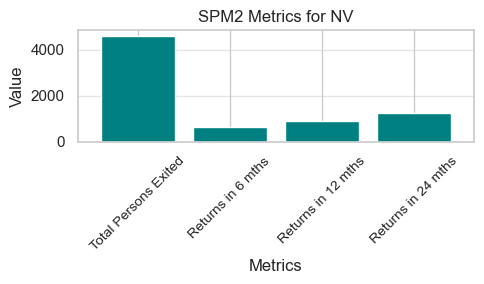

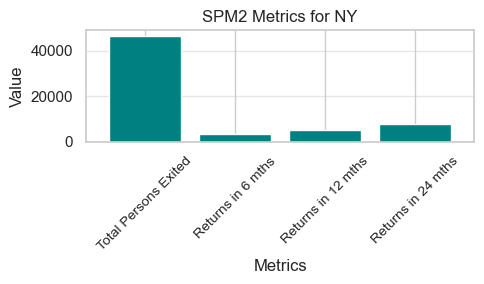

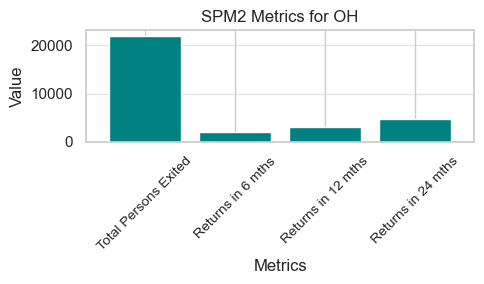

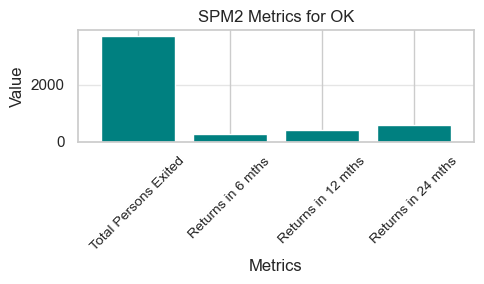

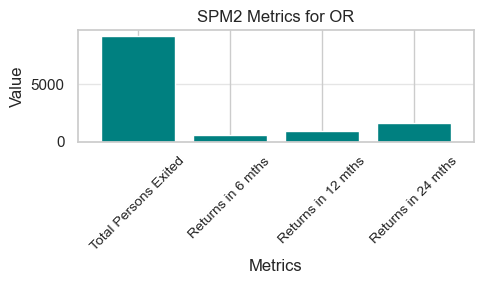

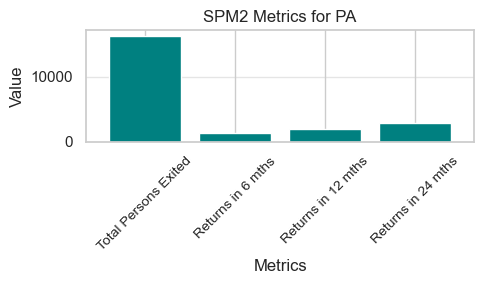

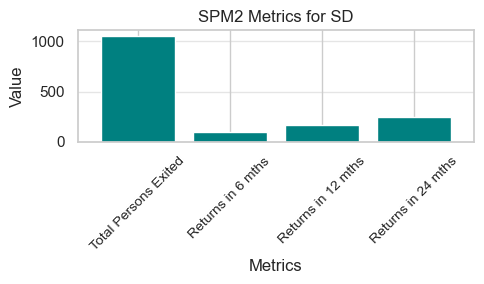

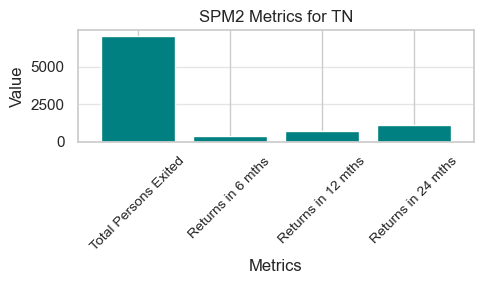

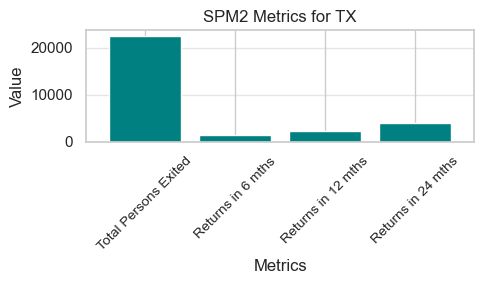

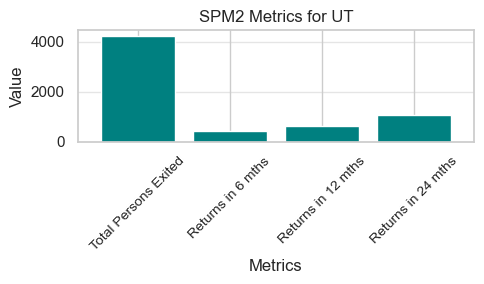

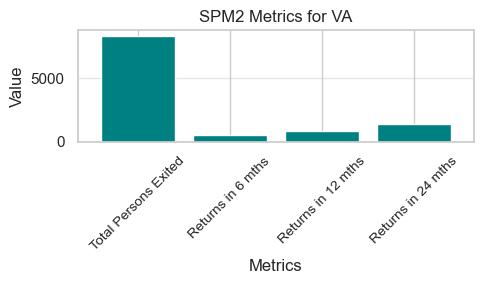

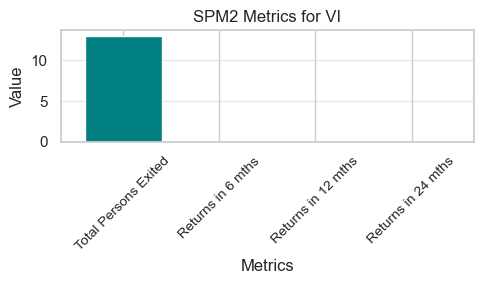

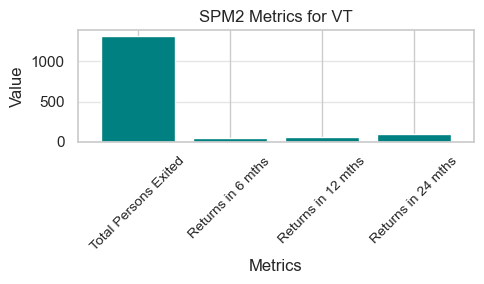

In [51]:
# Loop through each state
for state in state_aggregated.index:
    plt.figure(figsize=(5, 3))
    
    # Extract data for the current state
    state_data = state_aggregated.loc[state]
    
    # Plot bar chart
    state_data.plot(
        kind="bar", 
        title=f"SPM2 Metrics for {state}", 
        ylabel="Value", 
        xlabel="Metrics", 
        color="teal",
        width=0.8
    )
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, fontsize=10)
    plt.grid(alpha=0.5, axis="y")  # Add gridlines only for y-axis
    plt.tight_layout()
    
    # Show the plot
    plt.show()


In [45]:
# Line plot for trends across states
state_aggregated.plot(
    kind="line", 
    figsize=(12, 6), 
    marker="o", 
    colormap="viridis"
)
plt.title("State-Wise Trends in SPM 2 Metrics and Award Amounts", size=16)
plt.ylabel("Value")
plt.xlabel("State")
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


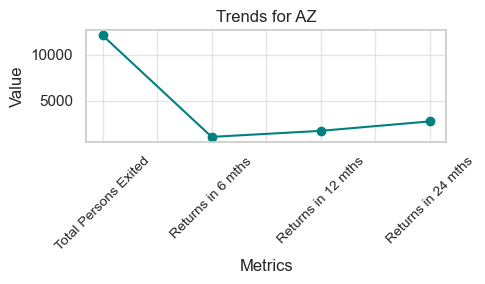

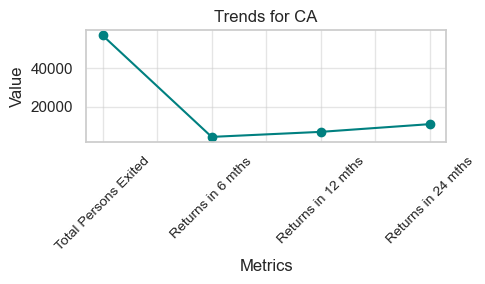

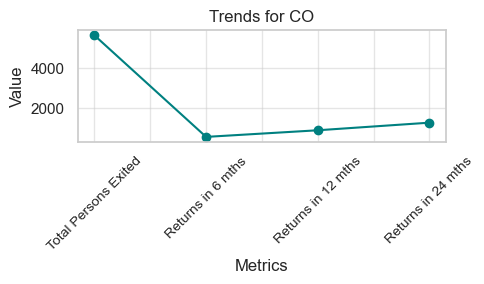

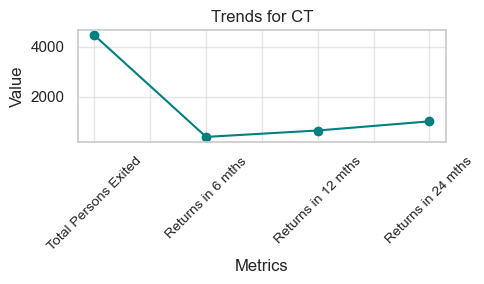

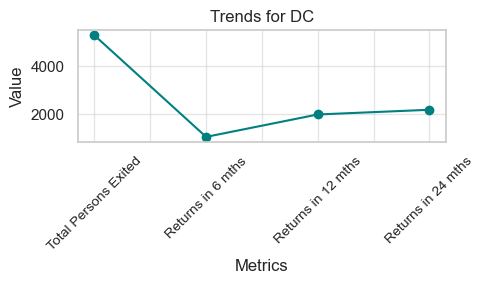

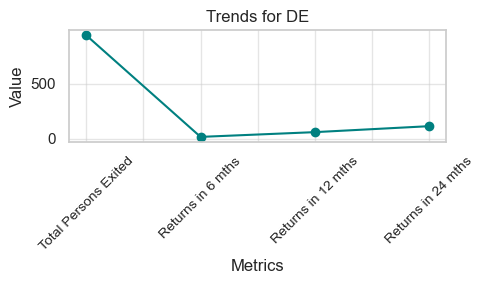

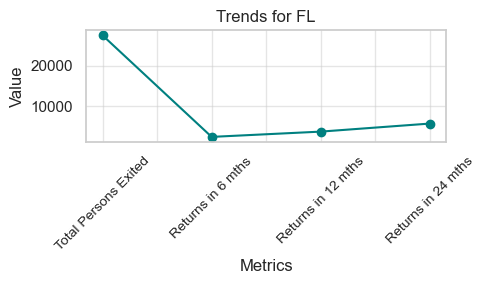

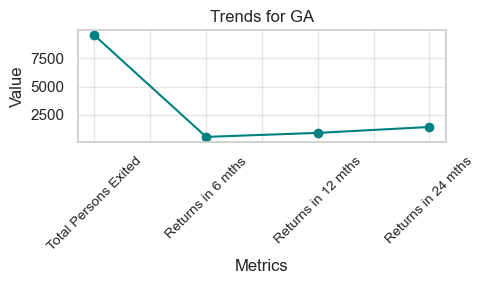

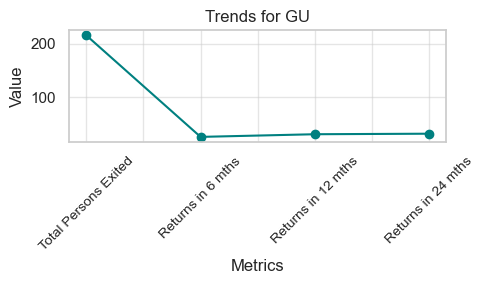

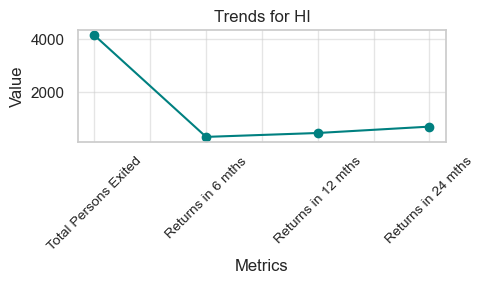

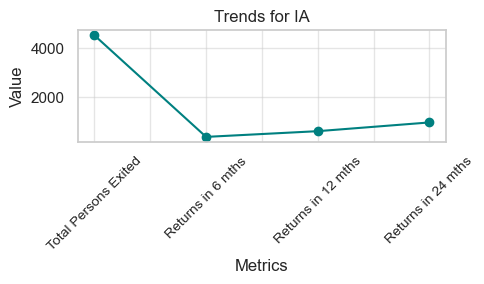

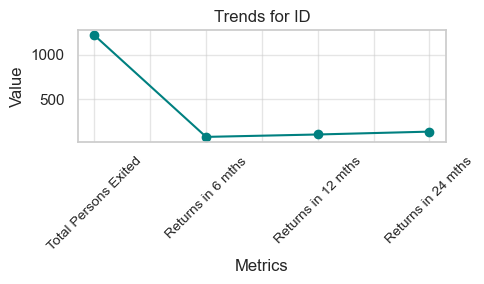

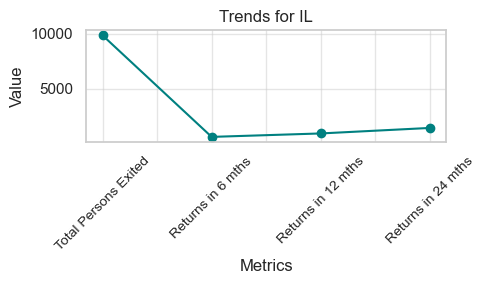

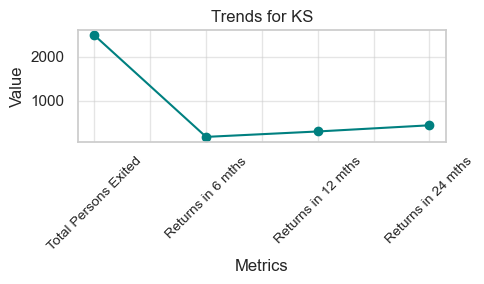

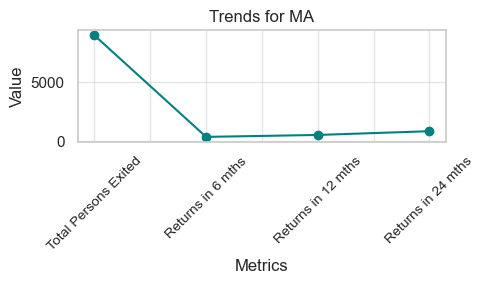

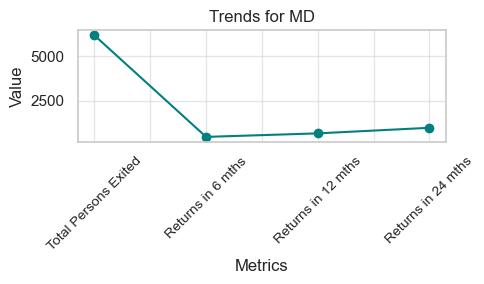

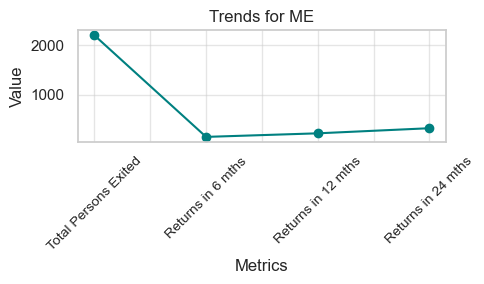

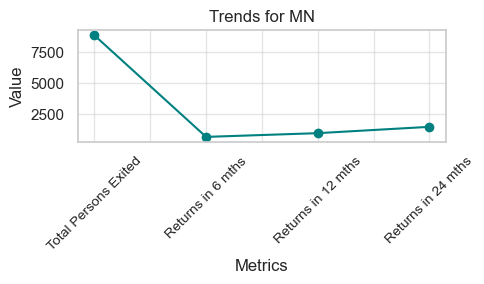

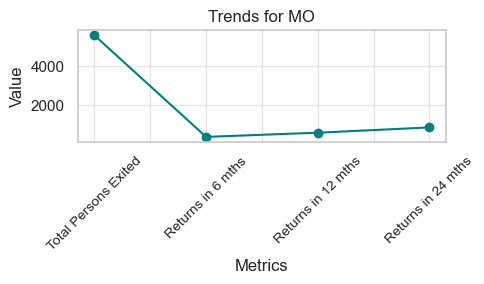

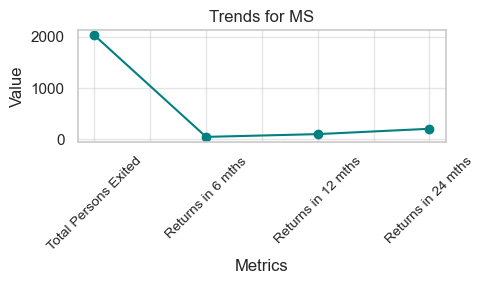

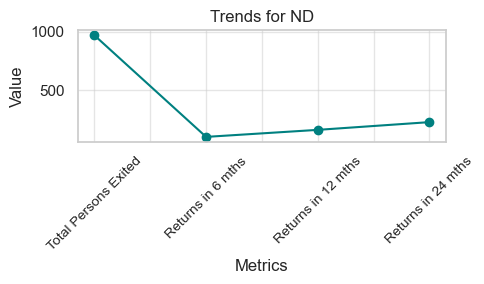

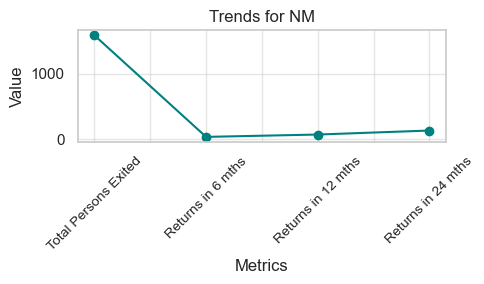

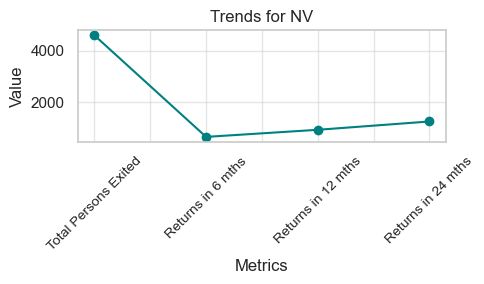

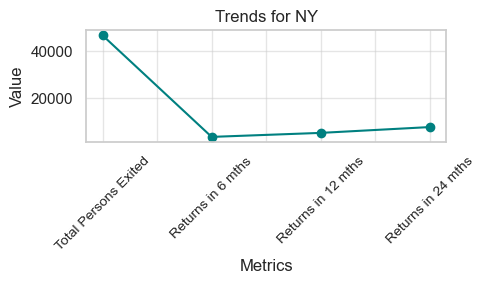

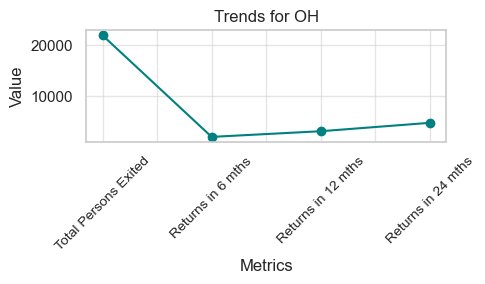

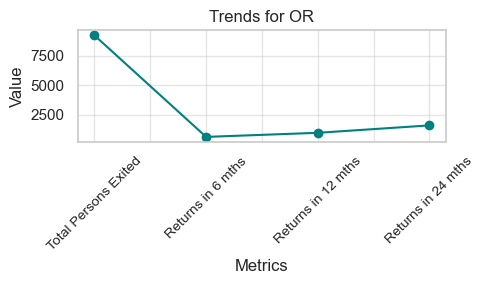

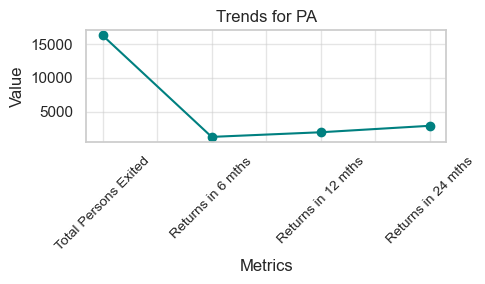

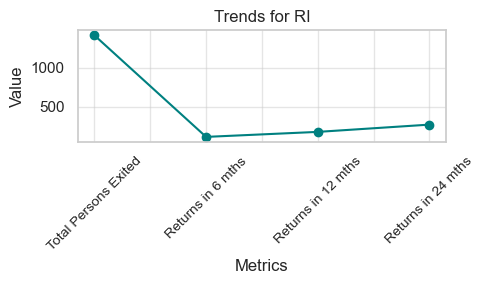

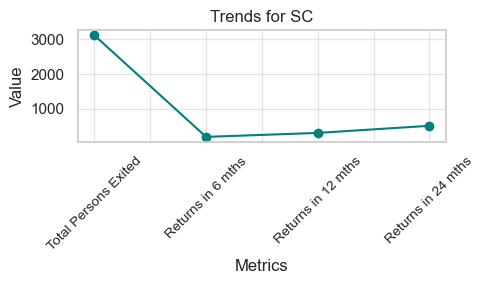

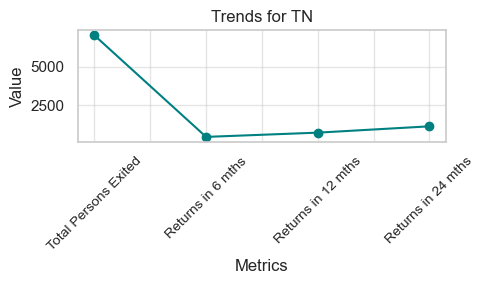

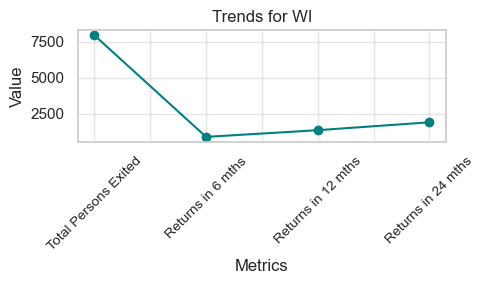

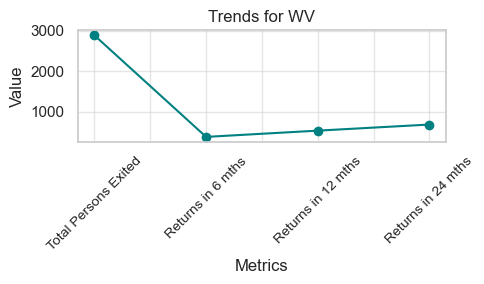

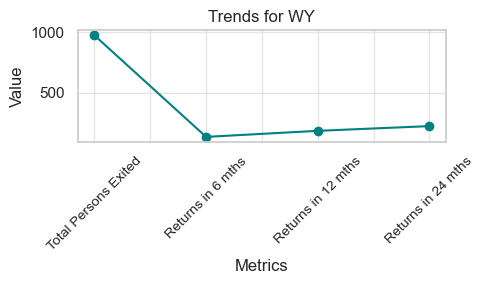

In [46]:
# Loop through each state and generate a trend plot

# Loop through each state
for state in state_aggregated.index:
    plt.figure(figsize=(5, 3))
    
    # Extract data for the current state
    state_data = state_aggregated.loc[state]
    
    # Plot line chart
    state_data.plot(
        kind="line", 
        marker="o", 
        title=f"Trends for {state}", 
        ylabel="Value", 
        xlabel="Metrics", 
        color="teal"
    )
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, fontsize=10)
    plt.grid(alpha=0.5)
    plt.tight_layout()
    
    # Show the plot
    plt.show()


In [52]:
import matplotlib.pyplot as plt
import numpy as np


# Assign a unique color to each state
states = state_aggregated.index
colors = plt.cm.tab20(np.linspace(0, 1, len(states)))  # Use the tab20 colormap for variety

# Create the plot
plt.figure(figsize=(10, 12))

# Plot each state's data
for state, color in zip(states, colors):
    state_data = state_aggregated.loc[state]
    plt.plot(
#         columns_to_plot,
        state_data,
        marker="o",
        label=state,
        color=color
    )

# Add labels and title
plt.title("Trends of SPM 2 Metrics by State", fontsize=16)
plt.ylabel("Value", fontsize=12)
plt.xlabel("Metrics", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10)
plt.grid(alpha=0.3)

# Add a legend
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title="State", fontsize=9)

# Adjust layout for better fit
plt.tight_layout()

# Show the plot
plt.show()


## Observation:

We can see from the graphs that for each state; the number of people returns increase by time. 

#### Paired t-test (Preferred for Comparisons Between Two Groups at a Time)
You can compare Returns in 6 months vs Returns in 12 months, and then Returns in 12 months vs Returns in 24 months.

In [53]:
from scipy.stats import ttest_rel

# Extract the columns
returns_6 = state_aggregated["Returns in 6 mths"]
returns_12 = state_aggregated["Returns in 12 mths"]
returns_24 = state_aggregated["Returns in 24 mths"]

# Perform paired t-tests
t_stat_6_vs_12, p_val_6_vs_12 = ttest_rel(returns_6, returns_12)
t_stat_12_vs_24, p_val_12_vs_24 = ttest_rel(returns_12, returns_24)

# Print results
print("Paired t-test results:")
print(f"6 months vs 12 months: t-statistic = {t_stat_6_vs_12:.3f}, p-value = {p_val_6_vs_12:.3e}")
print(f"12 months vs 24 months: t-statistic = {t_stat_12_vs_24:.3f}, p-value = {p_val_12_vs_24:.3e}")


Paired t-test results:
6 months vs 12 months: t-statistic = -5.258, p-value = 2.659e-06
12 months vs 24 months: t-statistic = -4.953, p-value = 7.841e-06


Interpretation
If the p-value is less than 0.05, the difference is statistically significant.
This would indicate that the number of returned people significantly increases over time.


#### Repeated Measures ANOVA (Preferred for Comparisons Across All Groups at Once)
This test checks whether there is a statistically significant difference across all three time points.

In [54]:
import pandas as pd
import numpy as np
from statsmodels.stats.anova import AnovaRM

# Prepare the data in long format for ANOVA
long_data = pd.DataFrame({
    "State": np.repeat(state_aggregated.index, 3),
    "Time": ["6 months", "12 months", "24 months"] * len(state_aggregated),
    "Returns": np.concatenate([returns_6, returns_12, returns_24])
})

# Perform repeated measures ANOVA
anova = AnovaRM(data=long_data, depvar="Returns", subject="State", within=["Time"]).fit()

# Print results
print(anova.summary())


               Anova
     F Value Num DF  Den DF  Pr > F
-----------------------------------
Time  0.6671 2.0000 106.0000 0.5153



Interpretation
Look for the p-value under the Time effect in the ANOVA summary table.
A p-value < 0.05 suggests significant differences across the three time periods.

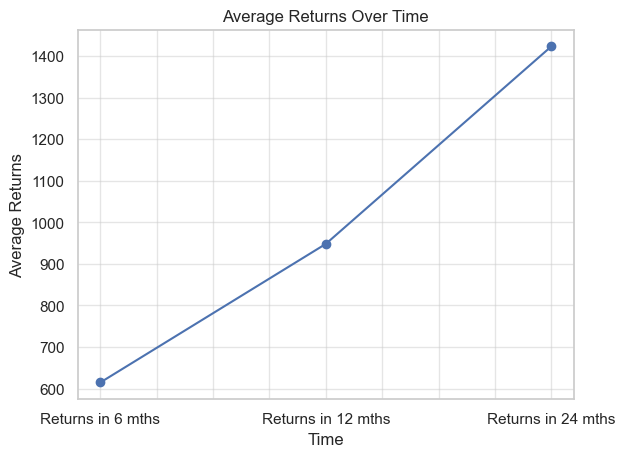

In [55]:
# Line plot showing trends for returns over time across all states
state_aggregated[["Returns in 6 mths", "Returns in 12 mths", "Returns in 24 mths"]].mean().plot(
    kind="line", marker="o", title="Average Returns Over Time", xlabel="Time", ylabel="Average Returns"
)
plt.grid(alpha=0.5)
plt.show()
